# Stream
- immutable flow of elements
- _sequential_ or _parallel_
- method chaining - intermediate operations return streams
- lazy traversal - intermediate operations deferred until stream is traversed by the terminal operation
- processing ends when results are determined -> remaining stream content can be ignored (e.g. _any_)
- Stream source can be
  - finite
  - infinite
  
## Stream API

- `BaseStream`   (core behaviour like sequential and parallel mode)
  - `Stream`
  - `DoubleStream`
  - `IntStream`
  - `LongStream`
  
- numeric streams: to avoid excessive boxing/ unboxing there are primitive stream variants

## Creating Streams
  - collection
  - array
  - static mehods on the `Stream` class

In [2]:
import java.util.stream.*;
import java.util.function.*;

In [31]:
// invinite stream of elements provided by Supplier
IntStream.generate(() -> (int)(Math.random() * 10))
    //.peek(it -> System.out.println(it))
    // stop stream when element is "3"  (includes it in the sum)
    .takeWhile(n -> n != 3)
    .sum();

86

In [8]:
// funky for loop
Stream.iterate(1, n -> n <= 5, n -> n + 1)
    .forEach(System.out::println)    

1
2
3
4
5


In [3]:
// creating from static method
Stream.of("A", "B", "C").collect(Collectors.joining(","))

A,B,C

In [4]:
// creating from collection
List.of(1, 2, 3).stream().count()

3

In [5]:
// array -> stream
String[] names = {"Ronny", "Peter"};
Arrays.stream(names).count();

2

## Stream Pipeline Processing Operations
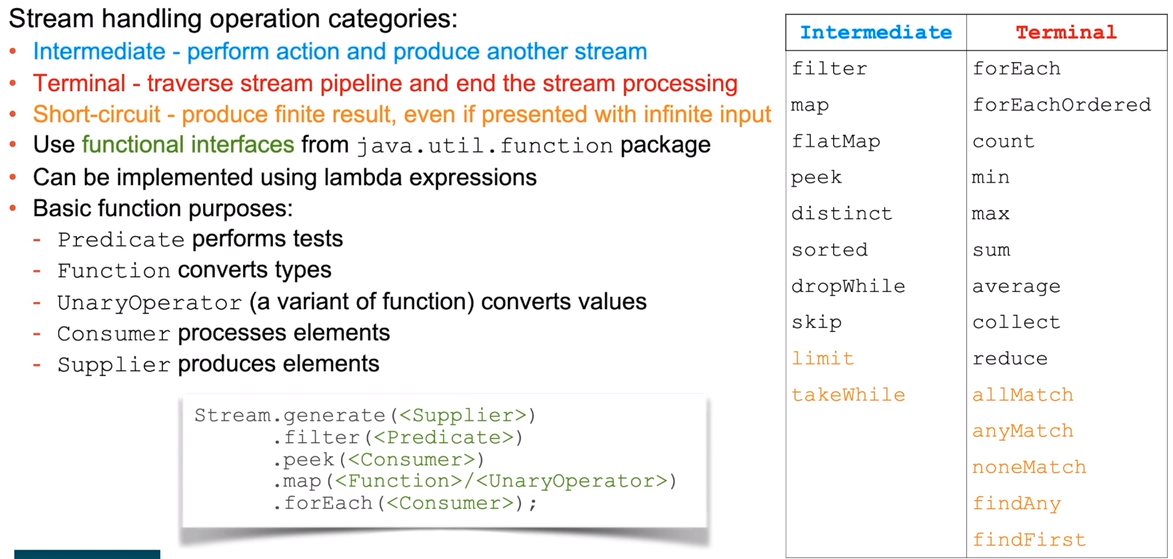


## Functional Interfaces
<img src=attachment:image.png width=700></img>
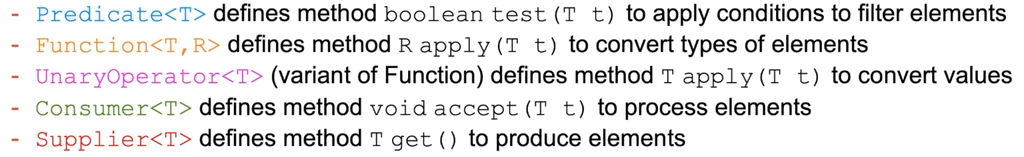

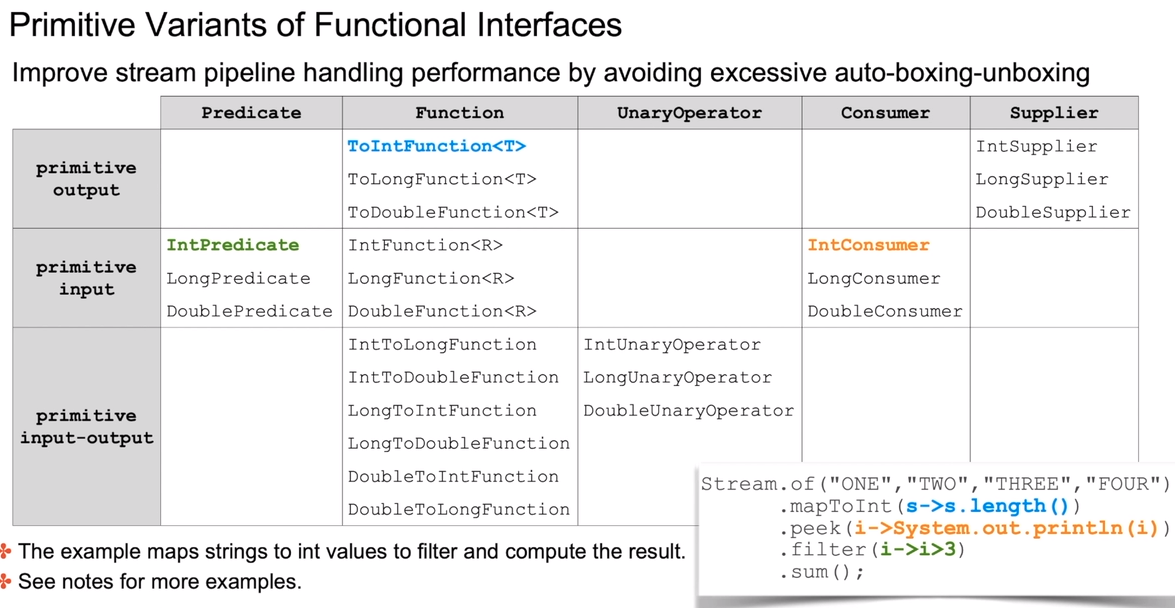

| Functional interface | Return type | Method name  |# of parameters   |
|----------------------|-------------|--------------|------------------|
| Supplier<T>          | T           | `get()`      | 0                |
| Consumer<T>          | void        | `accept(T)`  | 1 (T)            |
| BiConsumer<T, U>     | void        | `accept(T,U)`| 2 (T, U)         |
| Predicate<T>         | boolean     | `test(T)`    | 1 (T)            |
| BiPredicate<T, U>    | boolean     | `test(T,U)`  | 2 (T, U)         |
| Function<T, R>       | R           | `apply(T)`   | 1 (T)            | 
| BiFunction<T, U, R>  | R           | `apply(T,U)` | 2 (T, U)         |
| UnaryOperator<T>     | T           | `apply(T)`   | 1 (T)            |
| BinaryOperator<T>    | T           | `apply(T,T)` | 2 (T, T)         |

In [6]:
// example
// @FunctionalInterface
// public interface IntPredicate {
// 
//     /**
//      * Evaluates this predicate on the given argument.
//      *
//      * @param value the input argument
//      * @return {@code true} if the input argument matches the predicate,
//      * otherwise {@code false}
//      */
//     boolean test(int value);
// ...

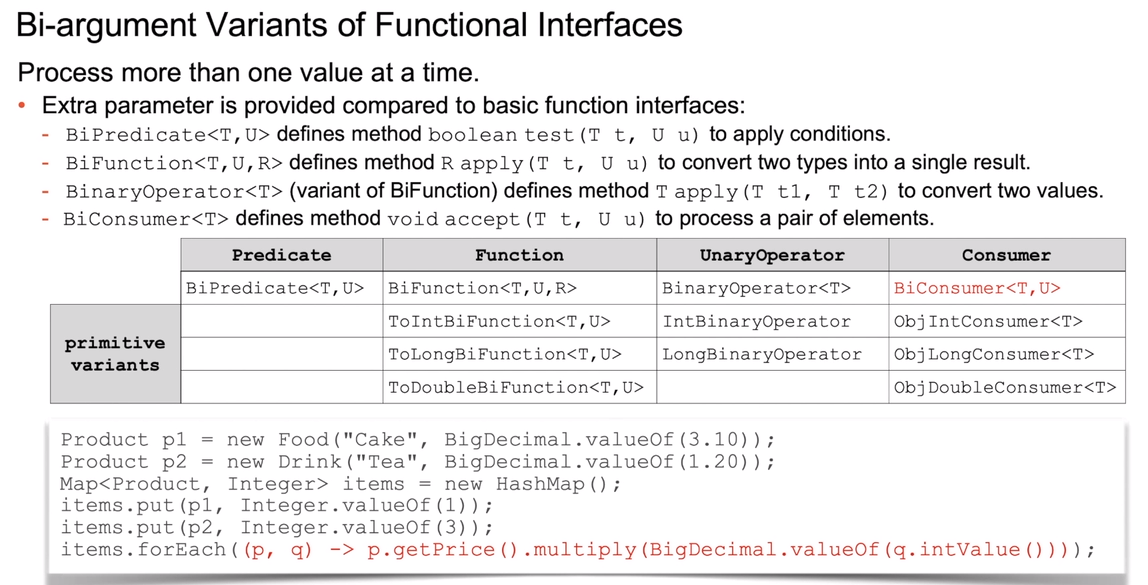

In [7]:
Map.of(
    "apple", "green",
    "pear", "orange"
// BiConsumer to cater key + value
).forEach((k, v) -> System.out.printf("key: %s - value: %s\n", k, v));

key: pear - value: orange
key: apple - value: green


In [8]:
// functional composition
Function<String, String> uppercase = s -> { 
    System.out.println("applying uppercase");    
    return s.toUpperCase();
};

UnaryOperator<String> trim = s -> { 
    System.out.println("applying trim");    
    return s.trim();
};

In [9]:
// andThen executes functions in the defined order
Function<String, String> change = uppercase.andThen(trim);

Stream.of("aa", "bb").map(change).forEach(it -> System.out.println(it));

applying uppercase
applying trim
AA
applying uppercase
applying trim
BB


In [10]:
// compose executes 2nd function first
Function<String, String> change = uppercase.compose(trim);

Stream.of("aa", "bb").map(change).forEach(it -> System.out.println(it));

applying trim
applying uppercase
AA
applying trim
applying uppercase
BB


## flatMap
- flatten a number of streams into a single stream

In [11]:
List.of(
    List.of(1, 2),
    List.of(3, 4)
).stream()
.flatMap(l -> l.stream())
.forEach(System.out::println)

1
2
3
4


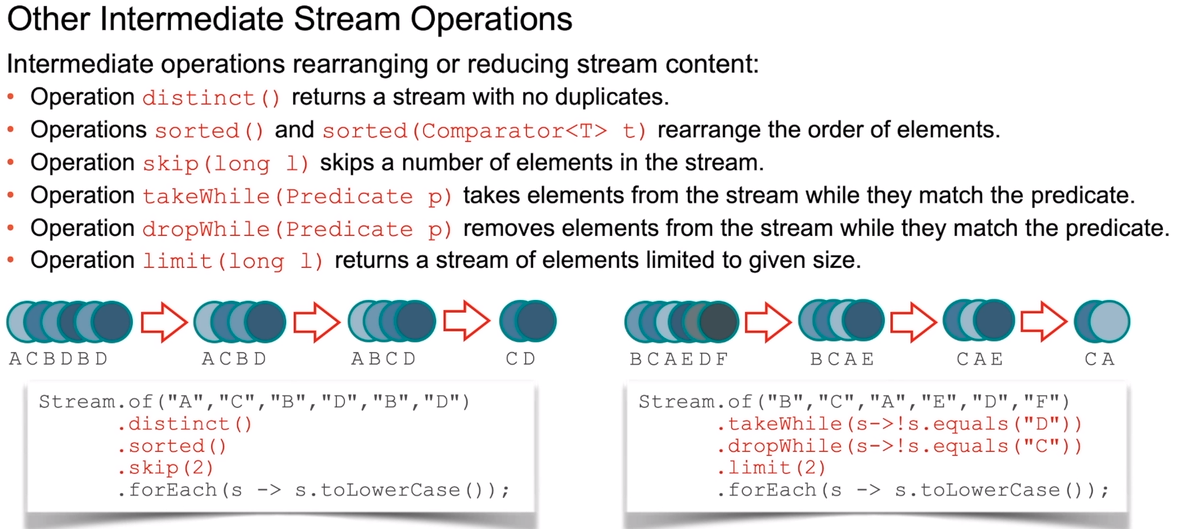

## Some Stream Terminal Operations

In [12]:
// allMatch
var names = List.of("Ronny", "Peter", "Klaus");
names.stream().allMatch(n -> n.startsWith("R"));

false

In [13]:
// anyMatch
names.stream().anyMatch(n -> n.startsWith("R"));

true

In [14]:
// noneMatch
names.stream().noneMatch(n -> n.startsWith("Q"));

true

In [15]:
// just some element of the stream
names.parallelStream().findAny()

Optional[Klaus]

In [16]:
// the first element
names.parallelStream().findFirst()

Optional[Ronny]

In [17]:
// average
IntStream.of(10, 30).average()

OptionalDouble[20.0]

In [18]:
// max and min
IntStream.of(1, 2).max()

OptionalInt[2]

## Optional

In [29]:
// no extra "throw" required
Optional.empty().orElseThrow(() -> new IllegalArgumentException())

EvalException: null

## Reduce
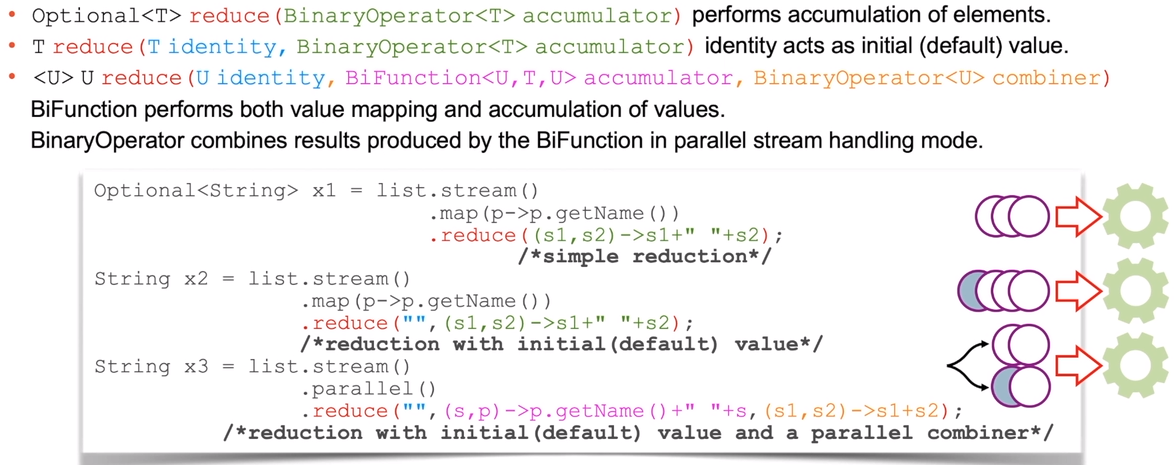

In [19]:
IntBinaryOperator mySum = (i1, i2) -> i1 + i2;

int baseValue = 42;
IntStream.of().reduce(baseValue, mySum)

42

In [20]:
IntStream.of(10).reduce(baseValue, mySum)

52

## collect

<img src=attachment:image.png width=800></img>

- post processing via finisher!
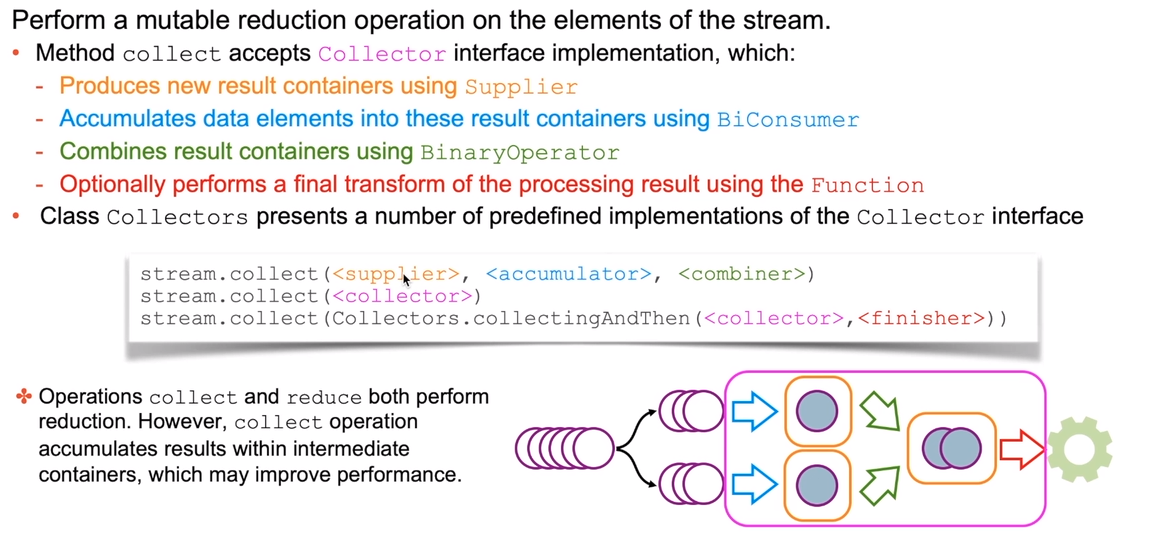

### Own Collector

In [24]:
Stream<String> stream = Stream.of("w", "o", "l", "f");

TreeSet<String> set = stream.collect(
    //TreeSet::new,   // supplier: provides new data structure
    () -> new TreeSet(),
    
    //TreeSet::add,    // accumulator (BiConsumer)
    (s, c) -> s.add(c),
    
    // TreeSet::addAll   // combiner (BinarOperator)
    (a1, a2) -> a1.addAll(a2)
);

set

[f, l, o, w]

## Finisher
<img src=attachment:image.png width=400></img>
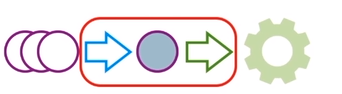

In [21]:
Stream.of("a", "b")
.collect(Collectors.collectingAndThen(
    Collectors.joining(","),   // collector
    it -> it.toUpperCase()));  // finisher

A,B

In [22]:
Stream.of(1, 2, 3).collect(Collectors.summarizingInt(it -> it))

IntSummaryStatistics{count=3, sum=6, min=1, average=2.000000, max=3}

In [23]:
// mapping the input in the terminal operation
// don't know when this is useful
Stream.of("a", "b").collect(Collectors.mapping(it -> it.toUpperCase(), Collectors.joining(",")))

A,B

## Paritioning And Grouping
<img src=attachment:image.png width=300></img>
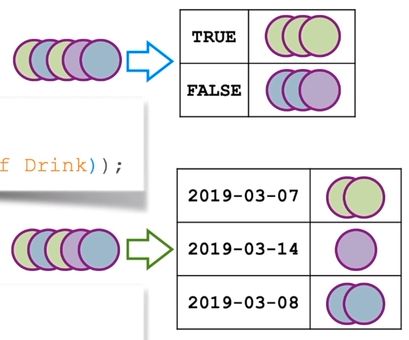

In [24]:
// partition even and uneven numbers
Stream.of(1, 2, 3, 4).collect(Collectors.partitioningBy(it -> it % 2 == 0))

{false=[1, 3], true=[2, 4]}

In [25]:
import java.time.*;

class Product {
    public String name;
    public LocalDate bestBefore;
    
    public Product(String name, LocalDate bestBefore) {
        this.name = name;
        this.bestBefore = bestBefore;
    }
    
    public String toString() {return name + " " + bestBefore;}
}

In [26]:
// grouping by date
Stream.of(
    new Product("A", LocalDate.of(2019,3,7)),
    new Product("B", LocalDate.of(2019,3,14)),    
    new Product("C", LocalDate.of(2019,3,8)),        
    new Product("D", LocalDate.of(2019,3,7)),
    new Product("E", LocalDate.of(2019,3,14))
).collect(Collectors.groupingBy(it -> it.bestBefore))

{2019-03-14=[B 2019-03-14, E 2019-03-14], 2019-03-08=[C 2019-03-08], 2019-03-07=[A 2019-03-07, D 2019-03-07]}

## Grouping with (Flat)Mapping And Filtering
<img src=attachment:image.png width=800></img>
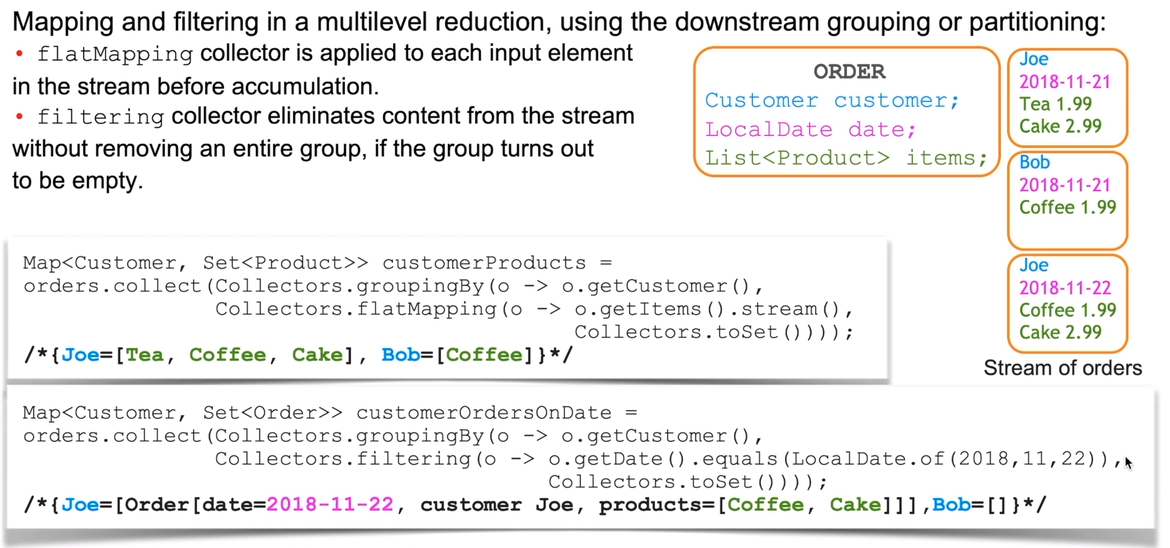

## Parallel
- idea
    - lot's of elements to process
    - using multiple CPU cores for that
- multiple calls to `parallel` and/ or `sequential` are ignored, last call is important
- stream elements are divided into subsets
- these subsets might be further split into subsets
- processing order is _indetermined_  (stochastic)  (not predictable)
- subsets are combined at the end

<img src=attachment:image.png width=400></img>
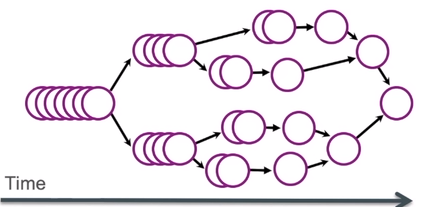

## Parallel Stream Processing Guidelines
- _stateless_ - state of one element must not effect the state of another element
- _non-interfering_ - stream data must not be changed
- _associative_ - the result must not be affected by the order of operands

## Parallel Processing - Things to avoid
- no operations which require sequential access to a shared resource (e.g. `.peek(System.out::println)` - the console is a sequential device)
- modifying shared resources 
    - e.g. `Stream.of(...).parallel().forEach(someOtherList.add(...))`
    - changes to shared view of the world for the parallel jobs
- use appropriate collectors 
    - `toConcurrentMap` instead of `toMap`
    - `toList` is thread safe!
  